In [39]:
%reload_ext autoreload
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

from statsmodels.tsa.seasonal import seasonal_decompose

# import own scripts
import sys
sys.path.insert(0, '/src/')

%autoreload 2
from utils import plot_multi, norm_dist_test, Model, clean_ff, grid_search_SARIMA


In [32]:
# load data
ff = clean_ff(pd.read_csv('data/FEDFUNDS.csv'))
ff.tail()

,FedFundsRate
Date,
2018-03-01,1.51
2018-04-01,1.69
2018-05-01,1.70
2018-06-01,1.82
2018-07-01,1.91


## Analyze Seasonal Decomposition
---
> Which model `additive` or `multiplicative` has smaller residuals? <br>
> **Decision**: `additive`. See charts below

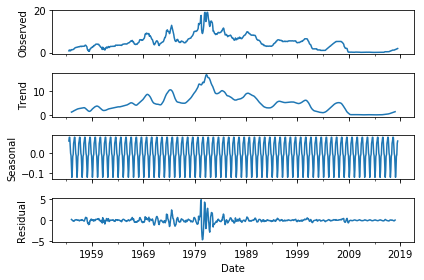

In [5]:
additive = seasonal_decompose(ff, model='additive').plot()

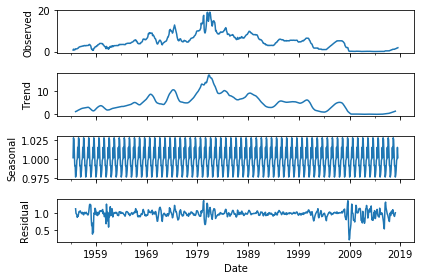

In [6]:
multiplicative = seasonal_decompose(ff, model='multiplicative').plot()

## Grid Search for best parameters for ARIMA Model
---

In [40]:
stepwise_model = grid_search_SARIMA(ff)

Fit ARIMA: order=(1, 1, 1) seasonal_order=(0, 1, 1, 12); AIC=1036.246, BIC=1059.386, Fit time=3.555 seconds
Fit ARIMA: order=(0, 1, 0) seasonal_order=(0, 1, 0, 12); AIC=1739.227, BIC=1748.483, Fit time=0.181 seconds
Fit ARIMA: order=(1, 1, 0) seasonal_order=(1, 1, 0, 12); AIC=1348.024, BIC=1366.536, Fit time=0.900 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(0, 1, 1, 12); AIC=1035.419, BIC=1053.931, Fit time=2.565 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(1, 1, 1, 12); AIC=1025.514, BIC=1048.654, Fit time=3.427 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(1, 1, 0, 12); AIC=1322.048, BIC=1340.561, Fit time=1.152 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(1, 1, 2, 12); AIC=1027.517, BIC=1055.285, Fit time=17.751 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(0, 1, 0, 12); AIC=1605.633, BIC=1619.517, Fit time=0.298 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(2, 1, 2, 12); AIC=1029.043, BIC=1061.439, Fit time=15.648 seconds
Fit ARIMA: order=(1, 1, 1)

In [41]:
stepwise_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 Statespace Model Results                                 
==========================================================================================
Dep. Variable:                                  y   No. Observations:                  769
Model:             SARIMAX(0, 1, 1)x(1, 1, 1, 12)   Log Likelihood                -507.757
Date:                            Wed, 12 Sep 2018   AIC                           1025.514
Time:                                    17:12:19   BIC                           1048.654
Sample:                                         0   HQIC                          1034.427
                                            - 769                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -0.0010      0.002     -0.507      0.612      -0.005       0.003
ma.L1          0.4216      0.018     23.931      0.000       0.387       0.456
ar.S.L12      -0.1255      0.019     -6.661      0.000      -0.162      -0.089
ma.S.L12      -0.9987      0.817     -1.223      0.221      -2.600       0.602
sigma2         0.2094      0.170      1.234      0.217      -0.123       0.542
===================================================================================
Ljung-Box (Q):                      122.91   Jarque-Bera (JB):             90663.28
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               0.14   Skew:                            -3.08
Prob(H) (two-sided):                  0.00   Kurtosis:                        56.29
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [17]:
stepwise_model.get_params()

{'callback': None,
 'disp': 0,
 'maxiter': 50,
 'method': None,
 'order': (0, 1, 1),
 'out_of_sample_size': 0,
 'scoring': 'mse',
 'scoring_args': {},
 'seasonal_order': (1, 1, 1, 12),
 'solver': 'lbfgs',
 'start_params': None,
 'suppress_warnings': True,
 'transparams': True,
 'trend': 'c'}

In [33]:
train = ff.loc['1954-07-01':'2018-04-01']
test = ff.loc['2018-05-01':]

In [34]:
stepwise_model.fit(train)

ARIMA(callback=None, disp=0, maxiter=50, method=None, order=(0, 1, 1),
   out_of_sample_size=0, scoring='mse', scoring_args={},
   seasonal_order=(1, 1, 1, 12), solver='lbfgs', start_params=None,
   suppress_warnings=True, transparams=True, trend='c')

In [35]:
future_forecast = stepwise_model.predict(n_periods=len(test))

In [36]:
future_forecast = pd.DataFrame(future_forecast,index = test.index,columns=['Prediction'])

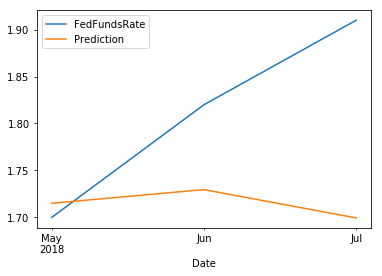

In [37]:
pd.concat([test,future_forecast],axis=1).plot()